In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\dataset\college_student_placement_dataset.csv')
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [3]:
df=df.drop('College_ID',axis=1)

In [4]:
df.isnull().sum()

IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      10000 non-null  int64  
 1   Prev_Sem_Result         10000 non-null  float64
 2   CGPA                    10000 non-null  float64
 3   Academic_Performance    10000 non-null  int64  
 4   Internship_Experience   10000 non-null  object 
 5   Extra_Curricular_Score  10000 non-null  int64  
 6   Communication_Skills    10000 non-null  int64  
 7   Projects_Completed      10000 non-null  int64  
 8   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 703.3+ KB


In [7]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['Internship_Experience']=oe.fit_transform(df[['Internship_Experience']])
df['Placement']=oe.fit_transform(df[['Placement']])


In [8]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0.0,8,8,4,0.0
1,97,5.52,5.37,8,0.0,7,8,0,0.0
2,109,5.36,5.83,9,0.0,3,1,1,0.0
3,122,5.47,5.75,6,1.0,1,6,1,0.0
4,96,7.91,7.69,7,0.0,8,10,2,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      10000 non-null  int64  
 1   Prev_Sem_Result         10000 non-null  float64
 2   CGPA                    10000 non-null  float64
 3   Academic_Performance    10000 non-null  int64  
 4   Internship_Experience   10000 non-null  float64
 5   Extra_Curricular_Score  10000 non-null  int64  
 6   Communication_Skills    10000 non-null  int64  
 7   Projects_Completed      10000 non-null  int64  
 8   Placement               10000 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 703.3 KB


In [10]:
df['Placement'].value_counts()

Placement
0.0    8341
1.0    1659
Name: count, dtype: int64

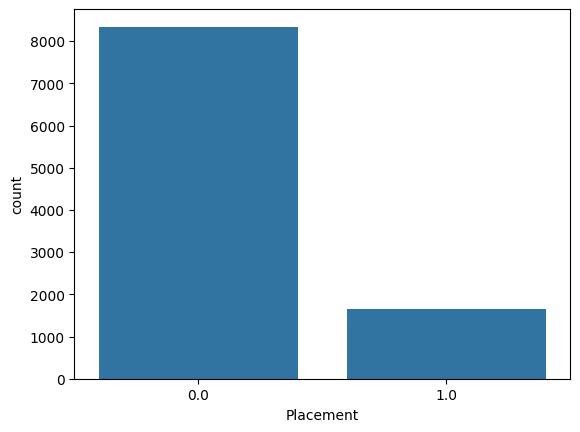

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df['Placement'])
plt.show()

In [13]:
from imblearn.under_sampling import RandomUnderSampler
x=df.drop('Placement',axis=1)
y=df['Placement']
random=RandomUnderSampler(sampling_strategy='majority')
x_sm,y_sm=random.fit_resample(x,y)
x_sm.shape,y_sm.shape

((3318, 8), (3318,))

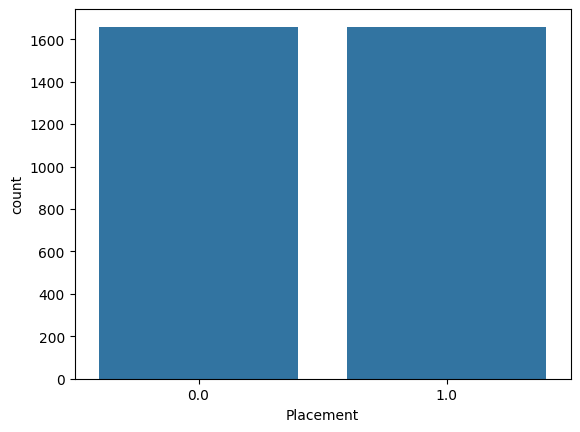

In [15]:
sns.countplot(x=y_sm)
plt.show()

In [16]:
x=df.drop('Placement',axis=1)
y=df['Placement']
x

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,107,6.61,6.28,8,0.0,8,8,4
1,97,5.52,5.37,8,0.0,7,8,0
2,109,5.36,5.83,9,0.0,3,1,1
3,122,5.47,5.75,6,1.0,1,6,1
4,96,7.91,7.69,7,0.0,8,10,2
...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,0.0,1,8,0
9996,70,9.25,9.34,7,0.0,0,7,2
9997,89,6.08,6.25,3,1.0,3,9,5
9998,107,8.77,8.92,3,0.0,7,5,1


In [17]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    1.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Placement, Length: 10000, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
ms=StandardScaler()
x=ms.fit_transform(x)

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


[1. 0. 0. ... 1. 0. 0.]
0.8993333333333333
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2511
         1.0       0.74      0.58      0.65       489

    accuracy                           0.90      3000
   macro avg       0.83      0.77      0.80      3000
weighted avg       0.89      0.90      0.89      3000

[[2413   98]
 [ 204  285]]


In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
lr.fit(x_test,y_test)
y_pred=lr.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


[1. 0. 0. ... 1. 0. 0.]
0.9
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2511
         1.0       0.74      0.59      0.66       489

    accuracy                           0.90      3000
   macro avg       0.83      0.78      0.80      3000
weighted avg       0.89      0.90      0.90      3000

[[2410  101]
 [ 199  290]]


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0. 0. 0. ... 1. 0. 1.]
0.9996666666666667
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       489

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[2511    0]
 [   1  488]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rf.fit(x_test,y_test)
y_pred=rf.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0. 0. 0. ... 1. 0. 1.]
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       489

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[2511    0]
 [   0  489]]


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


[0. 0. 0. ... 1. 0. 1.]
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       489

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[2511    0]
 [   0  489]]


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
dt.fit(x_test,y_test)
y_pred=dt.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0. 0. 0. ... 1. 0. 1.]
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       489

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[2511    0]
 [   0  489]]


In [25]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
gn.fit(x_train,y_train)
y_pred=gn.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0. 0. 0. ... 1. 0. 0.]
0.907
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      2511
         1.0       0.76      0.63      0.69       489

    accuracy                           0.91      3000
   macro avg       0.84      0.80      0.82      3000
weighted avg       0.90      0.91      0.90      3000

[[2411  100]
 [ 179  310]]


In [26]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
gn.fit(x_test,y_test)
y_pred=gn.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0. 0. 0. ... 1. 0. 0.]
0.9086666666666666
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      2511
         1.0       0.76      0.65      0.70       489

    accuracy                           0.91      3000
   macro avg       0.84      0.80      0.82      3000
weighted avg       0.90      0.91      0.91      3000

[[2409  102]
 [ 172  317]]


In [27]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0. 0. 0. ... 1. 0. 0.]
0.948
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2511
         1.0       0.91      0.75      0.83       489

    accuracy                           0.95      3000
   macro avg       0.93      0.87      0.90      3000
weighted avg       0.95      0.95      0.95      3000

[[2475   36]
 [ 120  369]]


In [28]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
kn.fit(x_test,y_test)
y_pred=kn.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0. 0. 0. ... 1. 0. 0.]
0.9603333333333334
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2511
         1.0       0.92      0.82      0.87       489

    accuracy                           0.96      3000
   macro avg       0.95      0.91      0.92      3000
weighted avg       0.96      0.96      0.96      3000

[[2478   33]
 [  86  403]]


In [29]:
from sklearn.svm import SVC
svc=SVC()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0. 0. 0. ... 1. 0. 0.]
0.952
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2511
         1.0       0.90      0.79      0.84       489

    accuracy                           0.95      3000
   macro avg       0.93      0.89      0.91      3000
weighted avg       0.95      0.95      0.95      3000

[[2469   42]
 [ 102  387]]


In [30]:
from sklearn.svm import SVC
svc=SVC()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
svc.fit(x_test,y_test)
y_pred=svc.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0. 0. 0. ... 1. 0. 0.]
0.955
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2511
         1.0       0.92      0.79      0.85       489

    accuracy                           0.95      3000
   macro avg       0.94      0.89      0.91      3000
weighted avg       0.95      0.95      0.95      3000

[[2477   34]
 [ 101  388]]


In [31]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB(var_smoothing=10,priors=None)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
gn.fit(x_train,y_train)
y_pred=gn.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0. 0. 0. ... 0. 0. 0.]
0.837
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      2511
         1.0       0.00      0.00      0.00       489

    accuracy                           0.84      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.70      0.84      0.76      3000

[[2511    0]
 [ 489    0]]


C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [32]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB(var_smoothing=10,priors=None)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
gn.fit(x_test,y_test)
y_pred=gn.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0. 0. 0. ... 0. 0. 0.]
0.837
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      2511
         1.0       0.00      0.00      0.00       489

    accuracy                           0.84      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.70      0.84      0.76      3000

[[2511    0]
 [ 489    0]]


C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",